# Pryngles Examples
## Full-science exploration example

## Paper 1 figures

This notebook produces the figures for the paper:

> Zuluaga, J. I., Sucerquia, M., & Alvarado-Montes, J. A. (2022). The bright side of the light curve: a general photometric model of non-transiting exorings. arXiv preprint [arXiv:2207.08636](https://arxiv.org/abs/2207.08636).

Authors:
- Mario Sucerquia, [mario.sucerquia@uv.cl](mailto:mario.sucerquia@uv.cl)
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.6.1 of `Pryngles`.  We have verified that it runs properly in version 0.6.1.
- Matplotlib commands run from version 2.2.x

### Preparation

Verify which version are you using here:

In [6]:
import site
site.getsitepackages()

['/Users/jorgezuluagacallejas/.virtualenvs/pryngles-stable/lib/python3.9/site-packages']

In [7]:
!which python

/Users/jorgezuluagacallejas/.virtualenvs/pryngles-stable/bin/python


Install pryngles:

In [8]:
!python -m pip install -q -U pryngles
!mkdir -p figures

Show version installed:

In [9]:
!pip show pryngles

Name: pryngles
Version: 0.7.0
Summary: PlanetaRY spanGLES: the bright-side of the light-curve of (ringed) exoplanets
Home-page: https://pypi.org/project/pryngles
Author: Jorge I. Zuluaga, Mario Sucerquia, Jaime A. Alvarado
Author-email: jorge.zuluaga@udea.edu.co
License: MIT
Location: /Users/jorgezuluagacallejas/.virtualenvs/pryngles-stable/lib/python3.9/site-packages
Requires: cmasher, dill, ipython, matplotlib, rebound, scipy, spiceypy, tqdm
Required-by: 


Install additional required packages for running this notebook:

In [10]:
!python -m pip install -q PyAstronomy astropy pyppluss batman

### Packages and data required

In [12]:
import pryngles as pr
import numpy as np
import matplotlib.pyplot as plt
print(pr.version)

import cmasher as cmr
from matplotlib import cm
from PyAstronomy import pyasl
%matplotlib inline

from astropy.constants import *
import astropy.units as u
from pyppluss.segment_models import LC_ringed

PPM=1e6

0.7.0


### General figure settings

In [13]:
#Legend properties
prop=dict(size=12)

#Color map
color=cm.Spectral_r(np.linspace(0,1,12))

#Font-size
plt.rcParams.update({'font.size': 14,})

### Illustrations

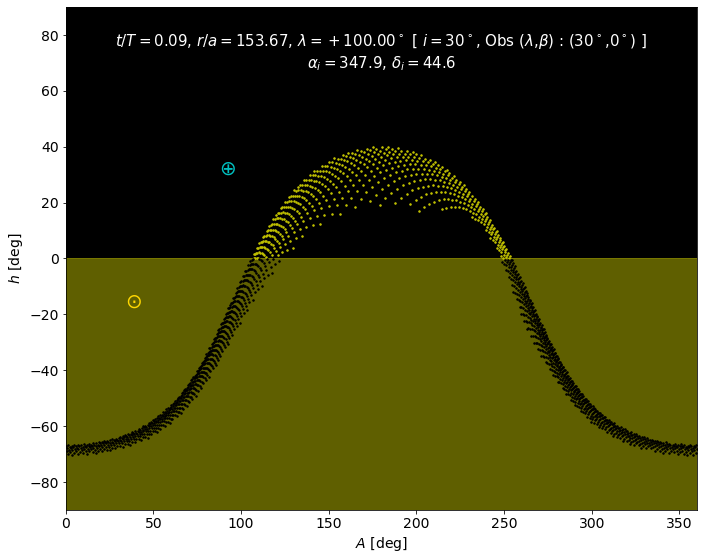

In [14]:
P=pr.RingedPlanet(Nr=3000,Np=3000,Nb=0,
               i=30*pr.DEG,a=0.2,e=0.6,
               lambq=0*pr.DEG,
               physics=dict(AL=1,AS=1,taug=1))

P.changeObserver([+30.0*pr.DEG,0.0*pr.DEG])
lamb=+100.0*pr.DEG
P._updateStellarPosition(lamb)
P.changeStellarPosition(lamb)

isel=2300

vv=0
rpi_equ=P.rps_equ[isel]/P.Rp
if vv:print(f"rp_{isel} = {rpi}")

Mhor2equ,Mequ2hor=pr.Util.transformLoc2EquSpherical(rpi_equ)
rstar_hor=pr.spy.mxv(Mequ2hor,P.rstar_equ/P.rstar)
estar_hor=pr.Util.transformRecLat(rstar_hor)
nobs_hor=pr.spy.mxv(Mequ2hor,P.nobs_equ)
eobs_hor=pr.Util.transformRecLat(nobs_hor)
if vv:print(f"rstar_equ = {P.rstar_equ/P.rstar}")
if vv:print(f"rstar_hor = {rstar_hor}")
if vv:print(f"nobs_equ = {P.nobs_equ}")
if vv:print(f"nobs_hor = {nobs_hor}")

#Ring points
cond=P.ir[P.irn]
iring=np.arange(P.Nr)[cond]
eij_hor=np.zeros((len(iring),2))
for n,j in enumerate(iring):
    if vv:print(f"j = {j}")
    rrj_equ=P.rrs_equ[j]/P.Rp
    if vv:print(f"\trr_{j} = {rrj_equ}")
    rij_equ=rrj_equ-rpi_equ
    if vv:print(f"\trij_equ = {rij_equ}")
    rij_hor=pr.spy.mxv(Mequ2hor,rij_equ)
    if vv:print(f"\trij_hor = {rij_hor}")
    eij_hor[n]=pr.Util.transformRecLat(rij_hor)
    if vv:print(f"\teij_hor = {eij_hor[n,0]*pr.RAD},{eij_hor[n,1]*pr.RAD}")
        
#The plot
fig=plt.figure(figsize=(10,8))
ax=fig.gca()

ax.text(estar_hor[0]*pr.RAD,estar_hor[1]*pr.RAD,
        '$\odot$',ha='center',va='center',fontsize=20,color='gold')
ax.text(eobs_hor[0]*pr.RAD,eobs_hor[1]*pr.RAD,
        '$\oplus$',ha='center',va='center',fontsize=20,color='c')

label=f"$t/T={P.t/P.T:.2f}$, $r/a={P.rstar/P.a:.2f}$, $\lambda={P.estar_ecl[0]*pr.RAD:+0.2f}^\circ$ [ $i={P.i*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$) ] "
label+=f"\n$\\alpha_i={P.eps_ecl[isel,0]*pr.RAD:.1f}$, $\delta_i={P.eps_ecl[isel,1]*pr.RAD:.1f}$"
ax.text(0.5,0.95,label,
        ha='center',va='top',
        transform=ax.transAxes,color='w', fontsize=15)

cond=eij_hor[:,1]>=0
ax.plot(eij_hor[cond,0]*pr.RAD,eij_hor[cond,1]*pr.RAD,'yo',ms=1.5)
cond=eij_hor[:,1]<0
ax.plot(eij_hor[cond,0]*pr.RAD,eij_hor[cond,1]*pr.RAD,'ko',ms=1.5)

ax.axhspan(-90,90,color='k')
ax.axhspan(-90,0,color='y',alpha=0.5)

ax.set_xlim((0,360));ax.set_ylim((-90,90))
ax.set_xlabel(r"$A$ [deg]")
ax.set_ylabel(r"$h$ [deg]")

fig.tight_layout()
fig.savefig(f"figures/ring_shine.png", dpi=250, facecolor="w")

316


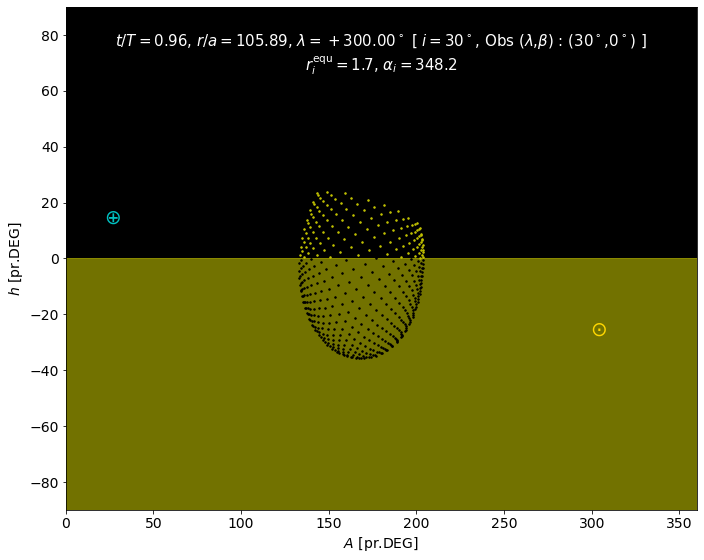

In [15]:
P.changeObserver([30.0*pr.DEG,0.0*pr.DEG])
lamb=+300.0*pr.DEG
P._updateStellarPosition(lamb)
P.changeStellarPosition(lamb)

#pr.Util.saveObject(Planet,filename)
irsel=np.random.randint(1940)
irsel=316
print(irsel)

vv=0
rri_equ=P.rrs_equ[irsel]/P.Rp
if vv:print(f"rr_{irsel} = {rri_equ}")

Mequ2hor=np.identity(3)
rstar_hor=pr.spy.mxv(Mequ2hor,P.rstar_equ/P.rstar)
estar_hor=pr.Util.transformRecLat(rstar_hor)
nobs_hor=pr.spy.mxv(Mequ2hor,P.nobs_equ)
eobs_hor=pr.Util.transformRecLat(nobs_hor)
if vv:print(f"rstar_equ = {P.rstar_equ/P.rstar}")
if vv:print(f"rstar_hor = {rstar_hor}")
if vv:print(f"nobs_equ = {P.nobs_equ}")
if vv:print(f"nobs_hor = {nobs_hor}")

#Ring points
cond=P.ip
iplanet=np.arange(P.Np)[cond]
eij_hor=np.zeros((len(iplanet),2))
cosq=np.zeros(len(iplanet))
for n,j in enumerate(iplanet):
    if vv:print(f"j = {j}")
    rpj_equ=P.rps_equ[j]/P.Rp
    if vv:print(f"\trp_{j} = {rpj_equ}")
    rij_equ=rpj_equ-rri_equ
    if vv:print(f"\trij_equ = {rij_equ}")
    rij_hor=pr.spy.mxv(Mequ2hor,rij_equ)
    if vv:print(f"\trij_hor = {rij_hor}")
    cosq[n]=pr.spy.vdot(rpj_equ,rri_equ)-pr.spy.vnorm(rpj_equ)**2
    eij_hor[n]=pr.Util.transformRecLat(rij_hor)
    if vv:print(f"\teij_hor = {eij_hor[n,0]*pr.RAD},{eij_hor[n,1]*pr.RAD}")
    #if n>5:break
    #break
    
# Plot
fig=plt.figure(figsize=(10,8))
ax=fig.gca()

ax.text(estar_hor[0]*pr.RAD,estar_hor[1]*pr.RAD,
        '$\odot$',ha='center',va='center',fontsize=20,color='gold')
ax.text(eobs_hor[0]*pr.RAD,eobs_hor[1]*pr.RAD,
        '$\oplus$',ha='center',va='center',fontsize=20,color='c')

label=f"$t/T={P.t/P.T:.2f}$, $r/a={P.rstar/P.a:.2f}$, $\lambda={P.estar_ecl[0]*pr.RAD:+0.2f}^\circ$ [ $i={P.i*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$) ] "
label+=f"\n$r^\mathrm{{{{equ}}}}_i={pr.spy.vnorm(P.rrs_equ[irsel,:])/P.Rp:.1f}$, $\\alpha_i={P.ers_equ[irsel,0]*pr.RAD:.1f}$"
ax.text(0.5,0.95,label,
        ha='center',va='top',
        transform=ax.transAxes,color='w', fontsize=15)

cond=(eij_hor[:,1]>=0)*(cosq>0)
ax.plot(eij_hor[cond,0]*pr.RAD,eij_hor[cond,1]*pr.RAD,'yo',ms=1.5)
cond=(eij_hor[:,1]<0)*(cosq>0)
ax.plot(eij_hor[cond,0]*pr.RAD,eij_hor[cond,1]*pr.RAD,'ko',ms=1.5)

ax.axhspan(-90,90,color='k')
ax.axhspan(-90,0,color='y',alpha=0.6)

ax.set_xlim((0,360));ax.set_ylim((-90,90))
ax.set_xlabel(r"$A$ [pr.DEG]")
ax.set_ylabel(r"$h$ [pr.DEG]")
fig.tight_layout()
fig.savefig(f"figures/planet_shine.png", dpi=250, facecolor="w")

### Numerical experiments

### Single light curve

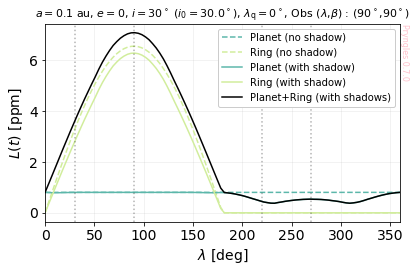

In [16]:
P=pr.RingedPlanet(Nr=5000,Np=5000,Nb=0,
               i=30*pr.DEG,a=0.1,e=0.0,
               lambq=0*pr.DEG,
               physics=dict(AL=1,AS=1,taug=1))

P.changeObserver([90*pr.DEG,90*pr.DEG])

title=f"$a={P.a:g}$ au, $e={P.e:g}$, $i={P.i*pr.RAD:g}^\circ$ ($i_0={P.io*pr.RAD:.1f}^\circ$), $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"
lamb_initial=+0.0*pr.DEG
lamb_final=+360*pr.DEG
lambs=np.linspace(lamb_initial,lamb_final,100)
Rps_noshadow=[]
Rrs_noshadow=[]
Rps_wshadow=[]
Rrs_wshadow=[]
S=[]

ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    ts+=[P.t*P.CU.UT]
    
    P.behavior["shadows"]=0
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_noshadow+=[P.Rip.sum()]
    Rrs_noshadow+=[P.Rir.sum()]
    
    P.behavior["shadows"]=1
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_wshadow+=[P.Rip.sum()]
    Rrs_wshadow+=[P.Rir.sum()]
    
    P.updateTransit()
    S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

ts=np.array(ts)
Rps_noshadow=np.array(Rps_noshadow)
Rrs_noshadow=np.array(Rrs_noshadow)
Rps_wshadow=np.array(Rps_wshadow)
Rrs_wshadow=np.array(Rrs_wshadow)
S=np.array(S)

#Middle transit
ts=(ts-ts[0])/pr.Const.days

#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(lambs*pr.RAD,1e6*Rps_noshadow,'--', color=color[2], label="Planet (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_noshadow,'--', color=color[4], label="Ring (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rps_wshadow,'-',   color=color[2], label="Planet (with shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_wshadow,'-',   color=color[4],label="Ring (with shadow)")
ax.plot(lambs*pr.RAD,1e6*(Rrs_wshadow+Rps_wshadow),'k-',label="Planet+Ring (with shadows)")

ls=":"
ax.axvline(30,color='k',ls=ls,alpha=0.3)
ax.axvline(90,color='k',ls=ls,alpha=0.3)
ax.axvline(220,color='k',ls=ls,alpha=0.3)
ax.axvline(270,color='k',ls=ls,alpha=0.3)

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")
ax.set_title(title,fontsize=11)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=1,fontsize=10);
fig.tight_layout()
ax.grid(alpha=0.2)
ax.margins(x=0)



fig.savefig(f"figures/samplelc.png", dpi=250, facecolor="w")


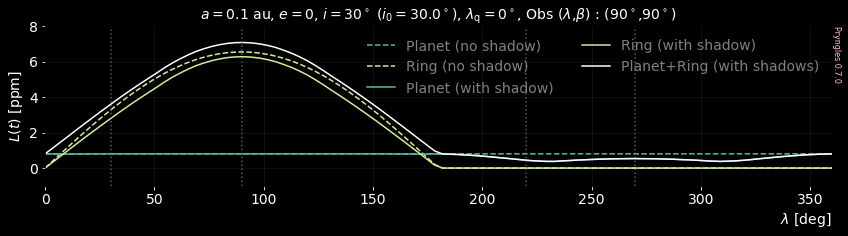

In [17]:

#Plot
fig=plt.figure(figsize=(12,3.5))
ax=fig.gca()    
ax.plot(lambs*pr.RAD,1e6*Rps_noshadow,'--', color=color[2], label="Planet (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_noshadow,'--', color=color[4], label="Ring (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rps_wshadow,'-',   color=color[2], label="Planet (with shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_wshadow,'-',   color=color[4],label="Ring (with shadow)")
ax.plot(lambs*pr.RAD,1e6*(Rrs_wshadow+Rps_wshadow),'w-',label="Planet+Ring (with shadows)")

ls=":"
ax.axvline(30,color='gray',ls=ls,alpha=0.7)
ax.axvline(90,color='gray',ls=ls,alpha=0.7)
ax.axvline(220,color='gray',ls=ls,alpha=0.7)
ax.axvline(270,color='gray',ls=ls,alpha=0.7)

ax.set_xlabel(f"$\lambda$ [deg]",  loc='right')
ax.set_ylabel("$L(t)$ [ppm]")
ax.set_title(title,fontsize=14, color="w")

pr.Extra.prynglesMark(ax)
legend=ax.legend(framealpha=0, ncol=2, fontsize=14);
plt.setp(legend.get_texts(), color='gray')
fig.tight_layout()
ax.grid(alpha=0.1)
ax.margins(x=0)

#BLACK:
ax.xaxis.label.set_color('w')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('w')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='w')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='w')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('k')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('k')         #setting up above X-axis tick color to red
ax.spines['bottom'].set_color('k')         #setting up above X-axis tick color to red
ax.spines['right'].set_color('k')        # setting up Y-axis tick color to red

ax.set_ylim(-1,8)

fig.set_facecolor('black')
#ax.set_axis_off()
ax.set_facecolor('black') 
fig.savefig(f"figures/samplelc_k.png", dpi=250, facecolor="k", edgecolor='k')


### Planetary configurations

In [18]:
P.changeStellarPosition(30*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
#ax.set_title(loc='left')
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.5,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}.png",dpi=250)

P.changeStellarPosition(90*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.1,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}.png",dpi=250)

P.changeStellarPosition(220*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.5,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}.png",dpi=250)

P.changeStellarPosition(270*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.1,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
#pr.Extra.prynglesMark(ax)

fig1.savefig(f"figures/samplelc-lambda_{lambstr}.png", dpi=250)

### A complex light-curve

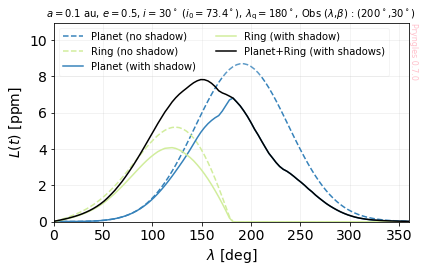

In [19]:
P=pr.RingedPlanet(Nr=3000,Np=3000,Nb=0,
               i=30*pr.DEG,a=0.1,e=0.5,
               lambq=180*pr.DEG,
               physics=dict(AL=1,AS=1,taug=1))

P.changeObserver([200*pr.DEG,30*pr.DEG])

title=f"$a={P.a:g}$ au, $e={P.e:g}$, $i={P.i*pr.RAD:g}^\circ$ ($i_0={P.io*pr.RAD:.1f}^\circ$), $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"
lamb_initial=+0.0*pr.DEG
lamb_final=+360*pr.DEG
lambs=np.linspace(lamb_initial,lamb_final,100)
Rps_noshadow=[]
Rrs_noshadow=[]
Rps_wshadow=[]
Rrs_wshadow=[]
S=[]

ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    ts+=[P.t*P.CU.UT]
    
    P.behavior["shadows"]=0
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_noshadow+=[P.Rip.sum()]
    Rrs_noshadow+=[P.Rir.sum()]
    
    P.behavior["shadows"]=1
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_wshadow+=[P.Rip.sum()]
    Rrs_wshadow+=[P.Rir.sum()]
    
    P.updateTransit()
    S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

ts=np.array(ts)
Rps_noshadow=np.array(Rps_noshadow)
Rrs_noshadow=np.array(Rrs_noshadow)
Rps_wshadow=np.array(Rps_wshadow)
Rrs_wshadow=np.array(Rrs_wshadow)
S=np.array(S)

#Middle transit
ts=(ts-ts[0])/pr.Const.days

#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(lambs*pr.RAD,1e6*Rps_noshadow,'--', color=color[1],label="Planet (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_noshadow,'--', color=color[4],label="Ring (no shadow)")
ax.plot(lambs*pr.RAD,1e6*Rps_wshadow,'-', color=color[1],label="Planet (with shadow)")
ax.plot(lambs*pr.RAD,1e6*Rrs_wshadow,'-', color=color[4],label="Ring (with shadow)")
ax.plot(lambs*pr.RAD,1e6*(Rrs_wshadow+Rps_wshadow),'k-',label="Planet+Ring (with shadows)")

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")
ax.set_title(title,fontsize=10)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=0.2, ncol=2, loc='upper left',fontsize=10);
fig.tight_layout()
ax.grid(alpha=0.2)
ymin,ymax=ax.get_ylim()
ax.set_ylim(0,1.2*ymax)
ax.margins(x=0)
fig.savefig(f"figures/samplelc-eccentric.png", dpi=250, facecolor="w")

In [20]:
P.changeStellarPosition(30*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
#ax.set_title(loc='left')
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.5,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}c.png",dpi=250)

P.changeStellarPosition(90*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.1,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}c.png",dpi=250)

P.changeStellarPosition(220*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.5,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
fig1.savefig(f"figures/samplelc-lambda_{lambstr}c.png",dpi=250)

P.changeStellarPosition(270*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,axis=False,showtitle=0)
fig1.tight_layout()
ax=fig1.gca()
lambstr=f"{P.lamb*pr.RAD:.0f}"
ax.text(0.1,1.0,rf"$\lambda={lambstr}^\circ$",fontsize=20,
        ha='center',va='top',
        transform=ax.transAxes,color='gold')
#pr.Extra.prynglesMark(ax)

fig1.savefig(f"figures/samplelc-lambda_{lambstr}c.png", dpi=250)

### Parameter variations

#### Routine

In [21]:
defpars=dict(Nr=1000,Np=1000,Nb=0,physics=dict(AL=1,AS=1,taug=1))
def lightCurve(posobs,**ringpars):
    global defpars
    thispars=defpars.copy()
    thispars.update(ringpars)

    P=pr.RingedPlanet(**thispars)
    P.changeObserver(posobs)

    lamb_initial=+0.0*pr.DEG
    lamb_final=+360*pr.DEG
    lambs=np.linspace(lamb_initial,lamb_final,100)
    Rps=[]
    Rrs=[]
    S=[]
    ts=[]
    for lamb in lambs:
        P.changeStellarPosition(lamb)
        ts+=[P.t*P.CU.UT]
        P.behavior["shadows"]=1
        P._updateIllumination()
        P._updateVisibility()
        P._updateActivity()
        P.updateOpticalFactors()
        P.updateDiffuseReflection()
        Rps+=[P.Rip.sum()]
        Rrs+=[P.Rir.sum()]   
        P.updateTransit()
        S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

    ts=np.array(ts)
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)
    S=np.array(S)

    #Middle transit
    ts=(ts-ts[0])/pr.Const.days
    
    return ts,lambs,Rps,Rrs,S

#### Eccentricity variation

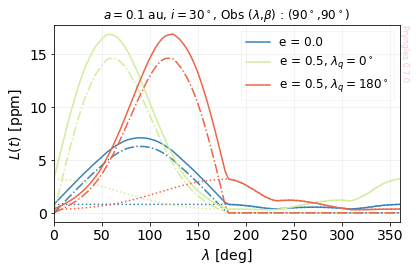

In [22]:
fig=plt.figure()
ax=fig.gca()    
posobs=[90*pr.DEG,90*pr.DEG]

c=color[1]
ringpars=dict(i=30*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.0)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"e = {ringpars['e']}",
        color=c)

c=color[4]
ringpars=dict(i=30*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"e = {ringpars['e']}, $\lambda_q={ringpars['lambq']*pr.RAD:.0f}^\circ$",
        color=c)

c=color[9]
ringpars=dict(i=30*pr.DEG,lambq=180*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"e = {ringpars['e']}, $\lambda_q={ringpars['lambq']*pr.RAD:.0f}^\circ$",
        color=c)

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")

title=f"$a={ringpars['a']:g}$ au, $i={ringpars['i']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=0.2, fontsize=12);
fig.tight_layout()
ax.margins(x=0)
ax.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-parameters-eccentricity.png", dpi=250, facecolor="w")

#### Inclination effect

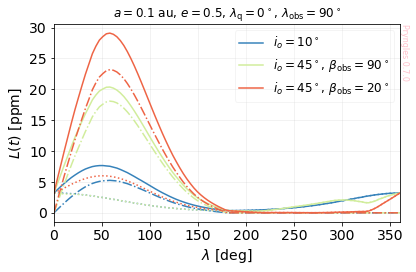

In [23]:
fig=plt.figure()
ax=fig.gca()    

c=color[1]
posobs=[90*pr.DEG,90*pr.DEG]
ringpars=dict(i=10*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=rf"$i_o = {ringpars['i']*pr.RAD:.0f}^\circ$",
        color=c)

c=color[4]
posobs=[90*pr.DEG,90*pr.DEG]
ringpars=dict(i=45*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
label=rf"$i_o = {ringpars['i']*pr.RAD:.0f}^\circ$, $\beta_\mathrm{{obs}} = {posobs[1]*pr.RAD:.0f}^\circ$"
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=label,
        color=c)

c=color[9]
posobs=[90*pr.DEG,20*pr.DEG]
ringpars=dict(i=45*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
label=rf"$i_o = {ringpars['i']*pr.RAD:.0f}^\circ$, $\beta_\mathrm{{obs}} = {posobs[1]*pr.RAD:.0f}^\circ$"
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=label,
        color=c)

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")

title=rf"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{obs}} = {posobs[0]*pr.RAD:g}^\circ$"
ax.set_title(title,fontsize=12)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=0.2, fontsize=12);
fig.tight_layout()
ax.margins(x=0)
ax.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-parameters-inclination.png", dpi=250, facecolor="w")

### Observer effect

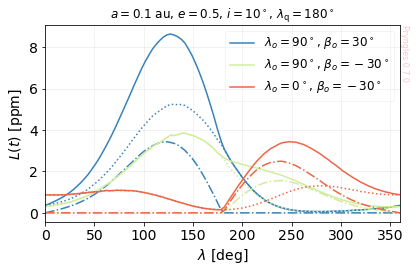

In [24]:
fig=plt.figure()
ax=fig.gca()    

c=color[1]
posobs=[90*pr.DEG,30*pr.DEG]
ringpars=dict(i=10*pr.DEG,lambq=180*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=rf"$\lambda_o = {posobs[0]*pr.RAD:.0f}^\circ$, $\beta_o = {posobs[1]*pr.RAD:.0f}^\circ$",
        color=c)

c=color[4]
posobs=[90*pr.DEG,-30*pr.DEG]
ringpars=dict(i=10*pr.DEG,lambq=180*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=rf"$\lambda_o = {posobs[0]*pr.RAD:.0f}^\circ$, $\beta_o = {posobs[1]*pr.RAD:.0f}^\circ$",
        color=c)

c=color[9]
posobs=[0*pr.DEG,-30*pr.DEG]
ringpars=dict(i=10*pr.DEG,lambq=180*pr.DEG,a=0.1,e=0.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=rf"$\lambda_o = {posobs[0]*pr.RAD:.0f}^\circ$, $\beta_o = {posobs[1]*pr.RAD:.0f}^\circ$",
        color=c)

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")

title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$"
ax.set_title(title,fontsize=12)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=0.2, fontsize=12);
fig.tight_layout()
ax.margins(x=0)
ax.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-parameters-observer.png", dpi=250, facecolor="w")

#### Ring size and planetary distance effect

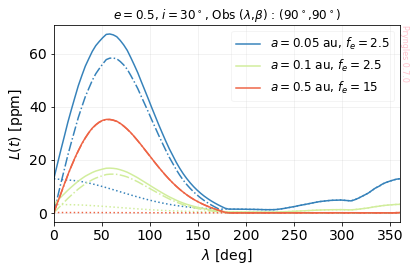

In [25]:
fig=plt.figure()
ax=fig.gca()    
posobs=[90*pr.DEG,90*pr.DEG]

c=color[1]
ringpars=dict(i=30*pr.DEG,lambq=0*pr.DEG,a=0.05,e=0.5,Rext=2.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"$a = {ringpars['a']}$ au, $f_e = {ringpars['Rext']}$",
        color=c)

c=color[4]
ringpars=dict(i=30*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.5,Rext=2.5)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"$a = {ringpars['a']}$ au, $f_e = {ringpars['Rext']}$",
        color=c)

c=color[9]
ringpars=dict(i=30*pr.DEG,lambq=0*pr.DEG,a=0.5,e=0.5,Rext=15)
ts,lambs,Rps,Rrs,S=lightCurve(posobs,**ringpars)
ax.plot(lambs*pr.RAD,1e6*Rrs,'r-.',color=c)
ax.plot(lambs*pr.RAD,1e6*Rps,'b:',color=c)
ax.plot(lambs*pr.RAD,1e6*S,'k-',
        label=f"$a = {ringpars['a']}$ au, $f_e = {ringpars['Rext']}$",
        color=c)

ax.set_xlabel(f"$\lambda$ [deg]")
ax.set_ylabel("$L(t)$ [ppm]")

title=f"$e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)

pr.Extra.prynglesMark(ax)
ax.legend(framealpha=0.2, fontsize=12);
fig.tight_layout()
ax.margins(x=0)
ax.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-parameters-distance.png", dpi=250, facecolor="w")

### Transit

### General routine

In [26]:
compfac=1e-3
ppm=1e6
defpars=dict(Nr=1000,Np=1000,Nb=0, physics=dict(AL=1,AS=1,taug=1))
def lightCurveComplete(posobs,**ringpars):
    global defpars
    thispars=defpars.copy()
    thispars.update(ringpars)

    P=pr.RingedPlanet(**thispars)
    P.changeObserver(posobs)

    lamb_initial=+0.0*pr.DEG
    lamb_final=+(360+180)*pr.DEG
    lambs=np.linspace(lamb_initial,lamb_final,1000)
    Rps=[]
    Rrs=[]
    Tps=[]
    Trs=[]
    S=[]
    ts=[]
    for lamb in lambs:
        P.changeStellarPosition(lamb)
        ts+=[P.t*P.CU.UT/pr.Const.days]
        P.behavior["shadows"]=1
        P._updateIllumination()
        P._updateVisibility()
        P._updateActivity()
        P.updateOpticalFactors()
        P.updateDiffuseReflection()
        P.updateTransit()
        Rps+=[P.Rip.sum()]
        Rrs+=[P.Rir.sum()]
        Tps+=[P.Tip.sum()]
        Trs+=[P.Tir.sum()]
        P.updateTransit()
        S+=[P.Rip.sum()+P.Rir.sum()-compfac*(P.Tip.sum()+P.Tir.sum())]

    ts=np.array(ts)
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)
    Tps=np.array(Tps)
    Trs=np.array(Trs)
    S=np.array(S)

    #Middle transit
    ts=np.unwrap(ts,period=P.T*P.CU.UT/pr.Const.days)
    ts-=ts[0]
    return ts,lambs,Rps,Rrs,Tps,Trs,S,P

### Full light-curve

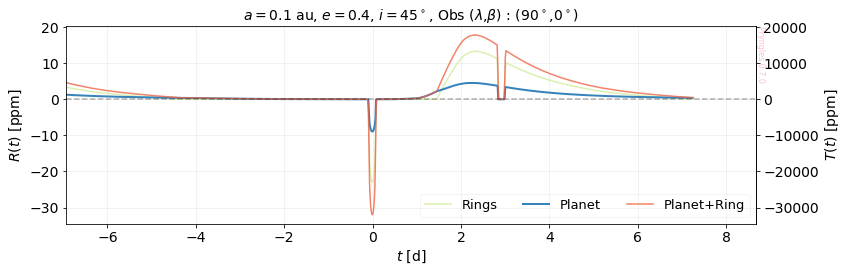

In [27]:
fig=plt.figure(figsize=(12,4))
ax=fig.gca()
posobs=[90*pr.DEG,0*pr.DEG]

#ringpars=dict(i=45*pr.DEG,lambq=180*pr.DEG,a=0.1,e=0.3)
ringpars=dict(i=45*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.4)

ts,lambs,Rps,Rrs,Tps,Trs,S,P=lightCurveComplete(posobs,**ringpars)
Per=P.T*P.CU.UT/pr.Const.days
cond=lambs>0
imin=np.argmin(S)
ts-=ts[imin]


#Ring component of the curve
Sr=Rrs-compfac*Trs
ax.plot(ts[cond],ppm*Sr[cond],'-',color=color[4],label="Rings", alpha=0.8)
#Planetary component of the curve
Sp=Rps-compfac*Tps
ax.plot(ts[cond],ppm*Sp[cond],'-',color=color[1],label="Planet", lw=2)
#The full curve
ax.plot(ts[cond],ppm*S[cond],'-',color=color[9],label="Planet+Ring", alpha=0.8)

#Decoration
ax.set_xlabel(f"$t$ [d]")
ax.set_ylabel("$R(t)$ [ppm]")
say=ax.secondary_yaxis('right',ylabel="$T(t)$ [ppm]",functions=(lambda x:1/compfac*x,lambda x:compfac*x))
ax.set_xlim(-1.2*Per/2,1.5*Per/2)

ax.axhline(0,ls='--',color='k',alpha=0.3)
ax.legend(framealpha=0.2, loc='upper center',ncol=3, fontsize=13);
ax.legend(framealpha=0.2, loc='lower right',ncol=3, fontsize=13);

ax.margins(x=0.0)



title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=14)
fig.tight_layout()
#ax.set_ylim(-26,15)
pr.Extra.prynglesMark(ax)
ax.margins(x=0)
ax.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-transit.png", dpi=250, facecolor="w")

In [28]:
posobs=[90*pr.DEG,0*pr.DEG]
ringpars=dict(i=45*pr.DEG,lambq=0*pr.DEG,a=0.1,e=0.4)

ts,lambs,Rps,Rrs,Tps,Trs,S,P=lightCurveComplete(posobs,**ringpars)

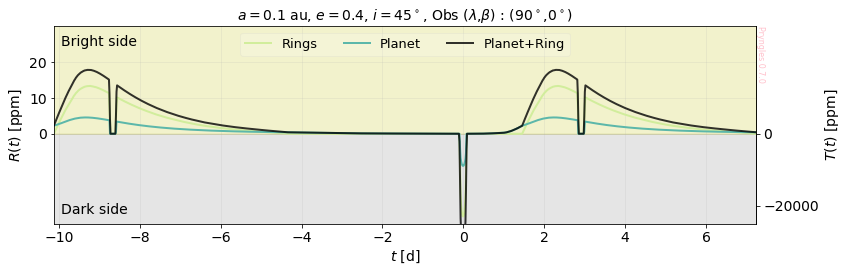

In [29]:
fig=plt.figure(figsize=(12,4))
ax=fig.gca()



Per=P.T*P.CU.UT/pr.Const.days
cond=lambs>0
imin=np.argmin(S)
ts-=ts[imin]

lwb=2

#Ring component of the curve
Sr=Rrs-compfac*Trs
ax.plot(ts[cond],ppm*Sr[cond],'-',color=color[4], lw=lwb, label="Rings")
#Planetary component of the curve
Sp=Rps-compfac*Tps
ax.plot(ts[cond],ppm*Sp[cond],'-',color=color[2], lw=lwb, label="Planet")
#The full curve
ax.plot(ts[cond],ppm*S[cond],'-',color="k", lw=lwb, label="Planet+Ring", alpha=0.8)

#Decoration
ax.set_xlabel(f"$t$ [d]")
ax.set_ylabel("$R(t)$ [ppm]")
say=ax.secondary_yaxis('right',ylabel="$T(t)$ [ppm]",functions=(lambda x:1/compfac*x,lambda x:compfac*x))
say.set_yticks([0,-20000,-40000])
#say.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#ax.set_xlim(-1.2*Per/2,1.5*Per/2)

#ax.axhline(0,ls='--',color='k',alpha=0.3)
ax.legend(framealpha=0.2, loc='upper center',ncol=3, fontsize=13);
#ax.legend(framealpha=0.2, loc='lower right',ncol=3, fontsize=13);

ax.margins(x=0.0)

ax.fill_between(ts, -35, 0, color="k", alpha=0.1)
ax.fill_between(ts,   0, 35,  color="y", alpha=0.2)

ax.text(0.01,0.05,"Dark side", color="k", transform=ax.transAxes)
ax.text(0.01,0.9,"Bright side", color="k", transform=ax.transAxes)

ax.set_yticks(np.arange(0,30,10)) 

title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=14)
fig.tight_layout()
ax.set_ylim(-25,30)
pr.Extra.prynglesMark(ax)
ax.margins(x=0)
ax.grid(alpha=0.2)
say.grid(alpha=0.2)
fig.savefig(f"figures/samplelc-transit-c.png", dpi=250, facecolor="w")

### Analytical comparisons

#### General routine

In [30]:
defpars=dict(Nr=5000,Np=5000,Nb=0,physics=dict(AL=1,AS=1,taug=1))
def lightCurveTime(posobs,**ringpars):
    global defpars
    thispars=defpars.copy()
    thispars.update(ringpars)

    P=pr.RingedPlanet(**thispars)
    P.changeObserver(posobs)

    ts=np.linspace(0,P.T,100)
    Rps=[]
    Rrs=[]
    S=[]
    lambs=[]
    for t in ts:
        P.changeStellarPosition(t,kepler=True)
        lambs+=[P.lamb]
        P.behavior["shadows"]=0
        P._updateIllumination()
        P._updateVisibility()
        P._updateActivity()
        P.updateOpticalFactors()
        P.updateDiffuseReflection()
        Rps+=[P.Rip.sum()]
        Rrs+=[P.Rir.sum()]   
        P.updateTransit()
        S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

    lambs=np.unwrap(np.mod(lambs,2*np.pi))
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)
    S=np.array(S)

    #Middle transit
    return ts,lambs,Rps,Rrs,S,P

#### Face-on system

In [31]:
# Pryngles prediction
posobs=[90*pr.DEG,90*pr.DEG]
AL=1
AS=1
#Lommel-Seeliger
#law=lambda x,y:x*y/(x+y)
#Lambertian
law=lambda x,y:x
ringpars=dict(i=30*pr.DEG,lambq=30*pr.DEG,a=0.1,e=0.3,physics=dict(AL=AL,AS=AS,taug=1,reflection_rings_law=law))
ts,lambs,Rps,Rrs,S,P=lightCurveTime(posobs,**ringpars)
cu2day=P.CU.UT/pr.Const.days

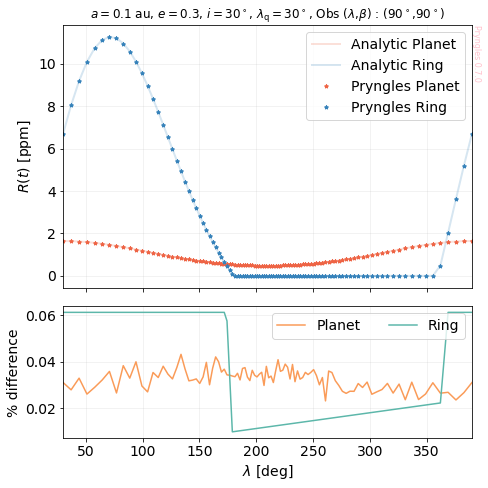

In [32]:
# Analytical prediction
#Orbit
orbit=pyasl.KeplerEllipse(a=P.a,per=P.T,e=P.e,tau=0,Omega=0.0,i=0.0,w=P.lambq*pr.RAD)

#Normal to the ring (ecliptic coordinates)
nr=np.array((0,np.sin(P.i),np.cos(P.i)))
#Normal to the observer
no=np.array([0,0,1])
#Area of the planet
Ap=np.pi*P.Rp**2
#Area of the ring
Ar=np.pi*((P.fe*P.Rp)**2-(P.fi*P.Rp)**2)
Rars=[]
Raps=[]
for t in ts:
    #Distance of the star to the planet
    rvec=orbit.xyzPos(t)
    r=np.linalg.norm(rvec)
    #Vector to the star
    ns=np.array([rvec[0],rvec[1],0])/r
    #Stellar light intensity
    S=1/(4*np.pi*(r/P.Rstar)**2)
    #----------------------------------------------
    #PLANET
    #----------------------------------------------
    Rp=AS*S*2/3*P.Rp**2
    Raps+=[Rp]
    #----------------------------------------------
    #RING
    #----------------------------------------------
    #Sun illumination
    cosL=np.dot(nr,ns)
    if cosL>0:
        #Brightness of sun on the disk
        B=S*cosL
        #Brightness of the disk from the observer
        cosZ=np.dot(nr,no)
        Rr=AL*B*Ar*cosZ
        Rars+=[Rr]
        #print(lamb*pr.RAD,r,S,cosL,B,cosZ,R)
    else:
        Rars+=[0]
    
Rars=np.array(Rars)
Raps=np.array(Raps)

#Plot
fig,axs=plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},figsize=(7,7),sharex=True)

ax=axs[0]
ax.plot(lambs*pr.RAD,Raps*PPM,'-', color=color[9], lw=2, alpha=0.2,label="Analytic Planet")
ax.plot(lambs*pr.RAD,Rars*PPM,'-', color=color[1], lw=2, alpha=0.2,label="Analytic Ring")
ax.plot(lambs*pr.RAD,1e6*Rps,'*' , color=color[9], lw=2, ms=4,     label="Pryngles Planet")
ax.plot(lambs*pr.RAD,1e6*Rrs,'*' , color=color[1], lw=2, ms=4,     label="Pryngles Ring")

ax.legend()
ax.set_ylabel("$R(t)$ [ppm]")
ax.margins(x=0)
title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)
pr.Extra.prynglesMark(ax)

#Residuals
ax=axs[1]
resp=(Raps*PPM-1e6*Rps)/(Raps*PPM)*100
ax.plot(lambs*pr.RAD,resp,'-',color=color[8], label="Planet")

ax=axs[1]
cond=Rars>0
resr=(Rars[cond]*PPM-1e6*Rrs[cond])/(Rars[cond]*PPM)*100
ax.plot(lambs[cond]*pr.RAD,resr,'-', color=color[2],label="Ring")

ax.legend(ncol=2)
ax.set_ylabel("% difference")
ax.margins(x=0)

#Common decoration
ax=axs[1]
ax.set_xlabel(f"$\lambda$ [deg]")

for ax in axs:
    ax.grid(alpha=0.2)
    
fig.tight_layout()
fig.savefig(f"figures/analytical-faceon.png", dpi=250, facecolor="w")

#### Edge-on system

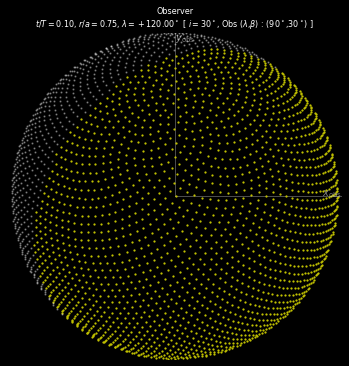

In [33]:
#Pryngles prediction
posobs=[90*pr.DEG,30*pr.DEG]
AL=1
AS=1
#Lambertian
law=lambda x,y:x
ringpars=dict(i=30*pr.DEG,lambq=30*pr.DEG,a=0.1,e=0.5,physics=dict(AL=AL,AS=AS,taug=1,reflection_rings_law=law))
ts,lambs,Rps,Rrs,S,P=lightCurveTime(posobs,**ringpars)
cu2day=P.CU.UT/pr.Const.days
#Preview
P.changeStellarPosition(120.0*pr.DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showring=0)
plt.close("all")
fig2

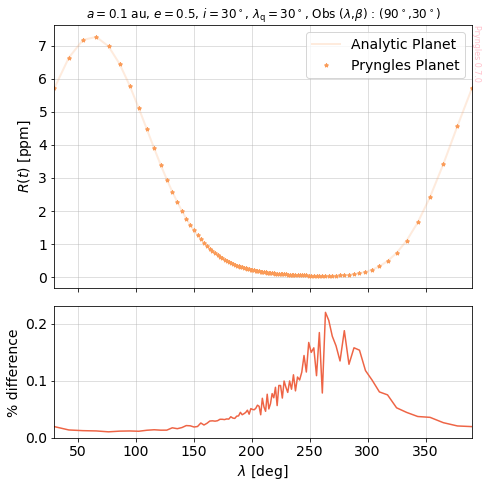

In [34]:
#Analytical prediction

#Orbit
orbit=pyasl.KeplerEllipse(a=P.a,per=P.T,e=P.e,tau=0,Omega=0.0,i=0.0,w=P.lambq*pr.RAD)

#Normal to the ring (ecliptic coordinates)
nr=np.array((0,np.sin(P.i),np.cos(P.i)))
#Normal to the observer
no=P.nobs_ecl
#Area of the planet
Ap=np.pi*P.Rp**2
#Geometric Albedo (Dyudina et al. 2016)
p=2*AS/3
Raps=[]
for t in ts:
    #Distance of the star to the planet
    rvec=orbit.xyzPos(t)
    r=np.linalg.norm(rvec)
    #Vector to the star
    ns=np.array([rvec[0],rvec[1],0])/r
    #Phase
    cosa=np.dot(ns,no)
    a=np.arccos(cosa)
    sina=np.sin(a)
    #Epsilon factor: Seager et al. 2000, paragraph before eq. (3) and Russel et al. 1916, paragraph befor eq. (4)
    epsilon=p*(P.Rp**2/(4*(r/P.Rstar)**2))
    #Phase function
    phi=(sina+(np.pi-a)*cosa)/np.pi
    Rp=epsilon*phi
    Raps+=[Rp]
    
Raps=np.array(Raps)

#Plot
fig,axs=plt.subplots(2,1,gridspec_kw={'height_ratios': [2, 1]},figsize=(7,7),sharex=True)

ax=axs[0]
ax.plot(lambs*pr.RAD,PPM*Raps,'-', color=color[8], lw=2, alpha=0.2,label="Analytic Planet")
ax.plot(lambs*pr.RAD,PPM*Rps,'*',  color=color[8],ms=4,label="Pryngles Planet")
ax.legend()
ax.set_ylabel("$R(t)$ [ppm]")
ax.margins(x=0)

title=f"$a={ringpars['a']:g}$ au, $e={ringpars['e']:g}$, $i={ringpars['i']*pr.RAD:g}^\circ$, $\lambda_\mathrm{{q}}={ringpars['lambq']*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({posobs[0]*pr.RAD:g}$^\circ$,{posobs[1]*pr.RAD:g}$^\circ$)"
ax.set_title(title,fontsize=12)
pr.Extra.prynglesMark(ax)

#Residuals
ax=axs[1]
resp=(Raps*PPM-PPM*Rps)/(Raps*PPM)*100
ax.plot(lambs*pr.RAD,resp,'-', color=color[9])
ax.set_ylabel("% difference")
ax.margins(x=0)

#Common decoration
ax=axs[1]
for ax in axs:ax.grid(alpha=0.5)
ax.set_xlabel(f"$\lambda$ [deg]")
fig.tight_layout()
fig.savefig(f"figures/analytical-edgeon.png", dpi=250, facecolor="w")

### Transits

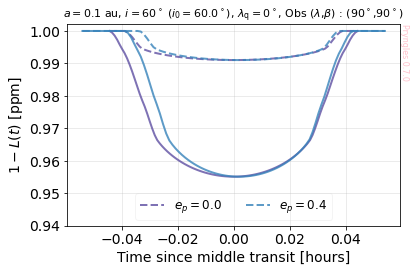

In [35]:
ecc=np.array([0.0,0.4])

fig=plt.figure(figsize=(6,4))
ax=fig.gca()    

alpha=0.8
lw   =2
fsl  =12
fsx  =14

for j, k in enumerate(ecc):
    
    P=pr.RingedPlanet(Nr=5000,Np=1000,Nb=0,
                   Rint=1.6,Rext=2.8,i=60*pr.DEG,
                   a=0.1,e=k,physics=dict(AL=1,AS=1,taug=1))
    thetas=P.thetas
    title=f"$a={P.a:g}$ au, $i={P.i*pr.RAD:g}^\circ$ ($i_0={P.io*pr.RAD:.1f}^\circ$), $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"

    P.changeObserver([90*pr.DEG,0*pr.DEG])
    P.changeStellarPosition(+270.0*pr.DEG+thetas)
    P.updateOpticalFactors()    
    
    lamb_initial=+270.0*pr.DEG-thetas-P.fe*P.thetap
    lamb_final=+270.0*pr.DEG+thetas+P.fe*P.thetap
    lambs=np.linspace(lamb_initial,lamb_final,100)



    Tps=[]
    Ts=[]
    ts=[]
    for lamb in lambs:
        P.changeStellarPosition(lamb)
        #This attribute keeps the value of time
        t=P.t*P.CU.UT

        #Compute transit
        P.updateOpticalFactors()
        P.updateTransit()
        Tp=P.Tip.sum()
        T=Tp+P.Tir.sum()

        ts+=[t]
        Tps+=[Tp]
        Ts+=[T]

    ts=np.array(ts)
    Ts=np.array(Ts)
    Tps=np.array(Tps)

    #Middle transit
    tmed=(ts[-1]+ts[0])/2
    ts=(ts-tmed)/pr.Const.hours


    #Plot


    ax.plot(ts/pr.RAD,1-Tps, "--", color=color[j], lw=lw, label="$e_p =$%.1f"%ecc[j],alpha=alpha)
    ax.plot(ts/pr.RAD,1-Ts, "-", color=color[j], lw=lw,alpha=alpha)

ax.set_xlabel("Time since middle transit [hours]", fontsize=fsx)
#ax.set_ylabel("Flux anomaly [ppm]", fontsize=fsx)
ax.set_ylabel("$1-L(t)$ [ppm]", fontsize=fsx)

ax.legend(ncol=3, loc="lower center", framealpha=0.2, fontsize=fsl)
pr.Extra.prynglesMark(ax)

ax.grid(alpha=0.3)
ax.set_ylim(0.94,)
ax.set_title(title,fontsize=11)

fig.tight_layout()
fig.savefig("./figures/transit_1e.png", dpi=250, facecolor="w")

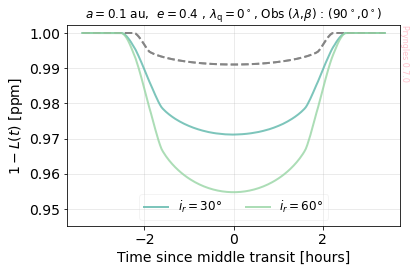

In [36]:
ies=np.array([30,60])
fig=plt.figure(figsize=(6,4))
ax=fig.gca()    

title=f"$a={P.a:g}$ au,  $e={P.e:g}$ , $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"
#$i={P.i*RAD:g}^\circ$ ($i_0={P.io*RAD:.1f}^\circ$)

for j, k in enumerate(ies):
    
    P=pr.RingedPlanet(Nr=5000,Np=1000,Nb=0,
                   Rint=1.2,Rext=2.6, i=k*pr.DEG,
                   a=0.1,e=0,physics=dict(AL=1,AS=1,taug=1))
    thetas=P.thetas
    thetas*pr.RAD

    P.changeObserver([90*pr.DEG,0*pr.DEG])
    P.changeStellarPosition(+270.0*pr.DEG+thetas)
    P.updateOpticalFactors()    
        
    lamb_initial=+270.0*pr.DEG-thetas-P.fe*P.thetap
    lamb_final=+270.0*pr.DEG+thetas+P.fe*P.thetap
    lambs=np.linspace(lamb_initial-0.02,lamb_final+0.02,200)


    Tps=[]
    Ts=[]
    ts=[]
    for lamb in lambs:
        P.changeStellarPosition(lamb)
        #This attribute keeps the value of time
        t=P.t*P.CU.UT

        #Compute transit
        P.updateOpticalFactors()
        P.updateTransit()
        Tp=P.Tip.sum()
        T=Tp+P.Tir.sum()

        ts+=[t]
        Tps+=[Tp]
        Ts+=[T]

    ts=np.array(ts)
    Ts=np.array(Ts)
    Tps=np.array(Tps)

    #Middle transit
    tmed=(ts[-1]+ts[0])/2
    ts=(ts-tmed)/pr.Const.hours


    #Plot

    ax.plot(ts,1-Tps, "--", color="gray", lw=lw,alpha=alpha)
    ax.plot(ts,1-Ts,  "-", color=color[j+2], lw=lw, label="$i_r =$%.0f°"%ies[j],alpha=alpha)

ax.set_xlabel("Time since middle transit [hours]", fontsize=fsx)
ax.set_ylabel("$1-L(t)$ [ppm]", fontsize=fsx)
ax.legend(ncol=3, loc="lower center", framealpha=0.2, fontsize=fsl)
ax.grid(alpha=0.3)
ax.set_ylim(0.99*min(1-Ts))
pr.Extra.prynglesMark(ax)

#ax.set_ylim(0.95,)

ax.set_title(title,fontsize=12)

fig.tight_layout()
fig.savefig("./figures/transit_1i.png", dpi=250, facecolor="w")

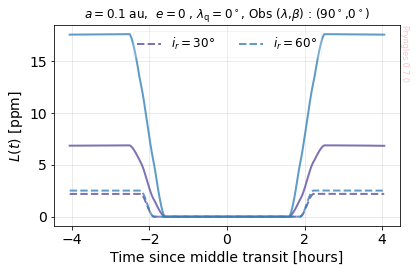

In [37]:
fig=plt.figure(figsize=(6,4))
ax=fig.gca()    



title=f"$a={P.a:g}$ au,  $e={P.e:g}$ , $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"

for j, k in enumerate(ies):

    P=pr.RingedPlanet(Nr=5000,Np=2000,Nb=100,
                   Rint=1.2,Rext=2.6,i=k*pr.DEG,
                   a=0.1,e=0.0,physics=dict(AL=1,AS=1,taug=1))
    thetas=P.thetas
    thetas*pr.RAD

    P.changeObserver([90*pr.DEG,0*pr.DEG])
    P.changeStellarPosition(+270.0*pr.DEG+thetas)
    P.updateOpticalFactors()    
    
    lamb_initial=+90.0*pr.DEG-(thetas+1.5*P.fe*P.thetap)
    lamb_final=+90.0*pr.DEG+(thetas+1.5*P.fe*P.thetap)
    lambs=np.linspace(lamb_initial-0.03,lamb_final+0.03,200)

    Bp=[]
    Rs=[]
    ts=[]

    for lamb in lambs:
        P.changeStellarPosition(lamb)
        #This attribute keeps the value of time
        t=P.t*P.CU.UT

        #Compute transit
        P.updateOpticalFactors()
        P.updateDiffuseReflection()

        ts+=[t]
        Rs+=[P.Rip.sum()+P.Rir.sum()]
        Bp+=[P.Rip.sum()]

    ts=np.array(ts)
    Rs=np.array(Rs)
    Bp=np.array(Bp)

    #Middle transit
    tmed=(ts[-1]+ts[0])/2
    ts=(ts-tmed)/pr.Const.hours


    #Plot
   
    ax.plot(ts,1e6*Bp, "--", color=color[j],lw=lw, label="$i_r =$%.0f°"%ies[j],alpha=alpha)
    ax.plot(ts,1e6*Rs, "-", color=color[j],lw=lw,alpha=alpha)


ax.set_xlabel("Time since middle transit [hours]", fontsize=fsx)
ax.set_ylabel("$L(t)$ [ppm]", fontsize=fsx)
#ax.set_ylim(-0.09,1.1*max(1e6*Rs))
ax.legend(ncol=3, loc="upper center", framealpha=0.2, fontsize=fsl)
ax.set_title(title,fontsize=12)
pr.Extra.prynglesMark(ax)

ax.grid(alpha=0.3)
fig.tight_layout()
fig.savefig("./figures/occultation_1i.png", dpi=250, facecolor="w")

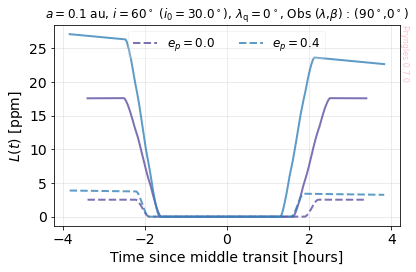

In [38]:
ecc=np.array([0.0,0.4])
fig=plt.figure(figsize=(6,4))
ax=fig.gca()    



for j, k in enumerate(ecc):

    P=pr.RingedPlanet(Nr=5000,Np=1000,Nb=100,
                   Rint=1.2,Rext=2.6, i=60*pr.DEG,
                   a=0.1,e=k,physics=dict(AL=1,AS=1,taug=1))
    thetas=P.thetas
    thetas*pr.RAD

    P.changeObserver([90*pr.DEG,0*pr.DEG])
    P.changeStellarPosition(+270.0*pr.DEG+thetas)
    P.updateOpticalFactors()    
    title=f"$a={P.a:g}$ au, $i={P.i*pr.RAD:g}^\circ$ ($i_0={P.io*pr.RAD:.1f}^\circ$), $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"

    lamb_initial=+90.0*pr.DEG-(thetas+2*P.fe*P.thetap)
    lamb_final=+90.0*pr.DEG+(thetas+2*P.fe*P.thetap)
    lambs=np.linspace(lamb_initial-0.01,lamb_final+0.01,500)
    
    Bp=[]
    Rs=[]
    ts=[]

    for lamb in lambs:
        P.changeStellarPosition(lamb)
        #This attribute keeps the value of time
        t=P.t*P.CU.UT

        #Compute transit
        P.updateOpticalFactors()
        P.updateDiffuseReflection()

        ts+=[t]
        Rs+=[P.Rip.sum()+P.Rir.sum()]
        Bp+=[P.Rip.sum()]

    ts=np.array(ts)
    Rs=np.array(Rs)
    Bp=np.array(Bp)

    #Middle transit
    tmed=(ts[-1]+ts[0])/2
    ts=(ts-tmed)/pr.Const.hours


    #Plot
   
    ax.plot(ts,1e6*Bp, "--", color=color[j],lw=lw, label="$e_p =$%.1f"%ecc[j],alpha=alpha)
    ax.plot(ts,1e6*Rs, "-", color=color[j],lw=lw,alpha=alpha)


ax.set_xlabel("Time since middle transit [hours]", fontsize=fsx)
ax.set_ylabel("$L(t)$ [ppm]", fontsize=fsx)
#ax.set_ylim(-0.09,1.1*max(1e6*Rs))

ax.legend(ncol=3, loc="upper center", framealpha=0.2, fontsize=fsl)
pr.Extra.prynglesMark(ax)

ax.set_title(title,fontsize=12)

ax.grid(alpha=0.3)
fig.tight_layout()
fig.savefig("./figures/occultation_1e.png", dpi=250, facecolor="w")

### Model validation

#### Transit of an spherical planet

In [39]:
yr=u.yr.to("s")
hour=3600
minutes=60

In [35]:
n=10000 #number of sampling point to the orbit

#limb darkening coeficients
c1  = 0.0
c2  = 0.0
c3  = 0.0
c4  = 0.0

ap  = 0.1    # [au]semi-major axis 

Rp1 = R_jup/au                 # - For pryngles
Rp2 = R_jup/R_sun * np.ones(n) # -  For pypplus

fi = 1    #[Rp] Ring's inner radius
fo = 1    #[RP] Ring's outer radius
tilt = 90 #[°]  Ring's tilt (with respect to the orbital plane)
y   = np.zeros(n)
#P.CU.UT

In [73]:
####------------------------------####
            #Pryngles
####-----------------------------####
def val_planet(lambs):

    P=pr.RingedPlanet(Nr=2,Np=10000,Rplanet=Rp1.value,
                   Rint=fi, Rext=fo,a=ap,e=0.0,
                   physics=dict(AL=0,AS=1,taug=0.,
                                limb_cs=[c1,c2,c3,c4]))

    thetas=P.thetas

    P.changeObserver([90*pr.DEG,0*pr.DEG])
    P.changeStellarPosition(0.0*pr.DEG+thetas)
    P.updateOpticalFactors() 


    Tps= []
    Ts = []
    ts = []
    xs=[]

    for lamb in lambs:
            P.changeStellarPosition(lamb)
            #This attribute keeps the value of time
            t=P.t*P.CU.UT

            #Compute transitP?
            P.updateOpticalFactors()
            P.updateTransit()
            Tp  = P.Tip.sum()
            T   = Tp #+ P.Tir.sum()

            ts += [t]
            Tps+= [Tp]
            Ts += [T]
            xs+=[-P.rstar_obs[0]]

    ts = np.array(ts)
    Ts = np.array(Ts)
    Tps= np.array(Tps)

    #Middle transit
    tmed=(ts[-1]+ts[0])/2
    ts=(ts-tmed)/pr.Const.hours
    xs=np.array(xs)
    
    return P, ts, Ts, Tps, tmed, ts, xs

lamb_initial =+ 270.0*pr.DEG-thetas-P.fe*P.thetap
lamb_final   =+(270.0*pr.DEG+thetas+P.fe*P.thetap)
lambs        =  np.linspace(lamb_initial-0.01,lamb_final+0.01,n)

P, ts, Ts, Tps, tmed, ts, xs = val_planet(lambs)

In [74]:
##        BATMAN      ##
import batman

def a2p(a): 
    #recives a in au
    #return P in s
    a=a*au.value
    return np.sqrt(4*np.pi**2/(G.value*M_sun.value) *a**3)
per=a2p(ap)
per/hour

277.2104951957394

In [75]:
per=a2p(ap)

params     = batman.TransitParams()
params.t0  = 0.                      #time of inferior conjunction
#params.per = P.T*P.CU.UT/hour                    #orbital period
params.per = per/hour                    #orbital period
params.rp  = R_jup/R_sun             #planet radius (in units of stellar radii)
params.a   = ap*au.value/R_sun.value #semi-major axis (in units of stellar radii)
params.inc = 90                       #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w   = 0.                        #longitude of periastron (in degrees)
#params.u   = [c1, c2, c3, c4]          #limb darkening coefficients [u1, u2]
#params.limb_dark = "nonlinear"         #limb darkening model
params.u   = []
params.limb_dark = "uniform"         #limb darkening model

m    = batman.TransitModel(params, ts)    #initializes model
flux = m.light_curve(params)          #calculates light curve


In [76]:
####------------------------------####
            #PYPPLUS
####-----------------------------####
roll = 0
tau  = 1

xs_bat=np.zeros_like(xs)
cond=xs<0
xs_bat[cond]=-m.ds[cond]
cond=xs>0
xs_bat[cond]=m.ds[cond]


####------------------------------####
            #PYPPLUS
####-----------------------------####
w     = 1
#w     = 0.8659 #90 deg
print(f"omega = {w}, tau={tau}")
LC_r = LC_ringed(Rp2.value, 0*fi*Rp2.value, 0*fo*Rp2.value, xs_bat, y, (90-tilt)*pr.DEG, roll*pr.DEG, w, c1, c2, c3, c4)

omega = 1, tau=1


In [77]:
lambs_bat=np.arcsin(xs_bat*P.Rstar/P.a)
lambs_bat
lambs=270*pr.DEG+lambs_bat

P, ts, Ts, Tps, tmed, ts, xs = val_planet(lambs)

In [78]:
## Depths discrepance

d_pyp = 1-min(LC_r)
d_teo = P.Ap/P.As
d_bat = 1-min(flux)
d_pry = 1-min((1-Tps))
print("depths models")
print("\t Geometric \t     pryngles  \t      batman    \t    piPpluss")

print(d_teo, d_pry , d_bat , d_pyp )

d_pry/d_teo, 
d_bat/d_teo, 

f_pt=  d_pyp/d_teo
f_bt=  d_bat/d_teo

#print(d_pry/d_teo, d_bat/d_teo , d_pyp/d_teo, f_pt)

depths models
	 Geometric 	     pryngles  	      batman    	    piPpluss
0.010566240684236245 0.010566240684236283 0.010560169441850897 0.010560169441850897


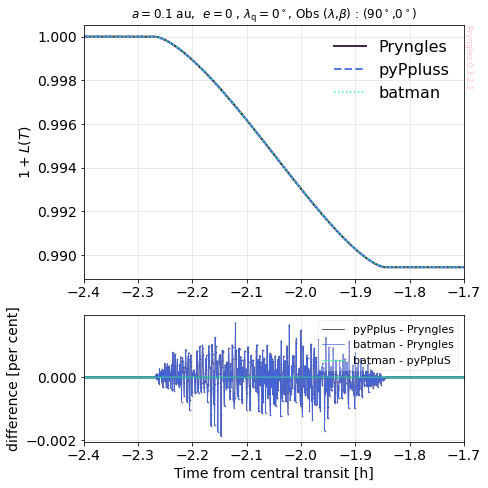

In [79]:
alpha=0.9
color=cm.turbo(np.linspace(0,1,9))
lw=2


f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(7,7))
title=f"$a={P.a:g}$ au,  $e={P.e:g}$ , $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"
a0.margins(x=0)
a0.set_title(title,fontsize=12)

a0.plot(ts, (1-Tps), "-", color=color[0], lw=lw, alpha=alpha, label="Pryngles")
a0.plot(ts, LC_r,    "--", color=color[1], lw=lw, alpha=alpha, label="pyPpluss")
a0.plot(ts, flux,    ":", color=color[3], label="batman")

a0.legend(fontsize=16, framealpha=0)

lw_r=0.8
alpha=0.9
a1.scatter(ts, (LC_r-(1-f_pt*Tps))/LC_r *100, color=color[0], alpha=0.6, s=0.3)
a1.plot(   ts, (LC_r-(1-f_pt*Tps))/LC_r *100, color=color[0], lw=lw_r,alpha=alpha, label="pyPplus - Pryngles")

a1.scatter(ts, (flux-(1-f_bt*Tps))/flux *100, color=color[1], alpha=0.6, s=0.3)
a1.plot(   ts, (flux-(1-f_bt*Tps))/flux *100, color=color[1], lw=lw_r,alpha=alpha, label="batman - Pryngles")

a1.scatter(ts, (flux-LC_r)/flux *100, color=color[3],alpha=0.6, s=0.3)
a1.plot(   ts, (flux-LC_r)/flux *100, color=color[3], lw=lw_r, alpha=alpha,label="batman - pyPpluS")


xmin=-2.4
xmax=-1.7


pr.Extra.prynglesMark(a0)

a1.grid(alpha=0.3)
a0.grid(alpha=0.3)

a0.set_xlim(xmin,xmax)
a1.set_xlim(xmin,xmax)
a1.set_xlabel("Time from central transit [h]", fontsize=fsx)
a0.set_ylabel("$1+L(T)$", fontsize=fsx)
a1.set_ylabel("difference [per cent]", fontsize=fsx)


f.tight_layout()
a1.legend(fontsize=11, framealpha=0.3)
f.savefig(f'./figures/comp_spheric_i{tilt}.png', dpi=250, facecolor="w")

#### The transit of a ringed planet

In [80]:
fi = 1.3    #[Rp] Ring's inner radius
fo = 2.6    #[RP] Ring's outer radius
tilt = 45 #[°]  Ring's tilt (with respect to the orbital plane)
y   = np.zeros(n)

In [81]:
####------------------------------####
            #Pryngles
####-----------------------------####
#P=RingedPlanet(Nr=5000,Np=5000,Nb=0,i=90*DEG,physics=dict(AL=1,AS=1,taug=1,limb_cs=[]))

P=pr.RingedPlanet(Nr=10000, Np=10000,Nb=100, Rplanet=Rp1.value,
               Rint=fi, Rext=fo,a=ap,e=0.0, i=tilt*pr.DEG,
               physics=dict(AL=1,AS=1,taug=1.0,
                            limb_cs=[c1,c2,c3,c4]))

thetas=P.thetas

P.changeObserver([90*pr.DEG,0*pr.DEG])
P.changeStellarPosition(0.0*pr.DEG+thetas)
P.updateOpticalFactors() 



lamb_initial =+ 270.0*pr.DEG-thetas-P.fe*P.thetap
lamb_final   =+(270.0*pr.DEG+thetas+P.fe*P.thetap)
lambs        =  np.linspace(lamb_initial-0.01,lamb_final+0.01,n)

Tps= []
Ts = []
ts = []

xs=[]
for lamb in lambs:
        P.changeStellarPosition(lamb)
        #This attribute keeps the value of time
        t=P.t*P.CU.UT

        #Compute transitP?
        P.updateOpticalFactors()
        P.updateTransit()
        Tp  = P.Tip.sum()
        T   = Tp + P.Tir.sum()

        ts += [t]
        Tps+= [Tp]
        Ts += [T]
        xs += [-P.rstar_obs[0]]

ts = np.array(ts)
Ts = np.array(Ts)
Tps= np.array(Tps)

#Middle transit
tmed=(ts[-1]+ts[0])/2
ts=(ts-tmed)/pr.Const.hours
xs=np.array(xs)


In [82]:
w=1-pr.Util.attenuationFactor([np.cos(P.io)],P.taueff)
w=0.9382
LC_r = LC_ringed(Rp2.value, fi*Rp2.value, fo*Rp2.value, xs, y, (tilt)*pr.DEG, roll*pr.DEG, w, c1, c2, c3, c4)
#1-pr.Util.attenuationFactor([np.cos(P.io)],P.taueff)

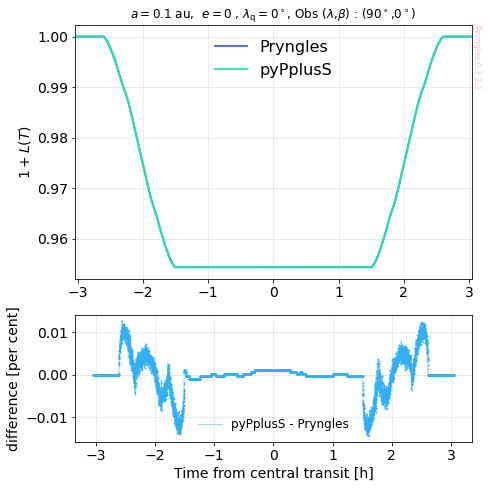

In [83]:
color=cm.turbo(np.linspace(0,0.7,7))
lw_r=0.8


f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, figsize=(7,7))
#plt.title=f"$a={P.a:g}$ au,  $e={P.e:g}$ , $\lambda_\mathrm{{q}}={P.lambq*RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*RAD:g}$^\circ$,{P.eobs_ecl[1]*RAD:g}$^\circ$)"
title=f"$a={P.a:g}$ au,  $e={P.e:g}$ , $\lambda_\mathrm{{q}}={P.lambq*pr.RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*pr.RAD:g}$^\circ$,{P.eobs_ecl[1]*pr.RAD:g}$^\circ$)"
a0.margins(x=0)
a0.set_title(title,fontsize=12)

minutes=1
a0.plot(ts, (1-f_pt*Ts), "-", color=color[1], lw=lw, alpha=alpha, label="Pryngles")
a0.plot(ts, LC_r,    "-", color=color[3], lw=lw, alpha=alpha, label="pyPplusS")

a0.legend(fontsize=16, framealpha=0)
a0.grid(alpha=0.3)


a1.scatter(ts, (LC_r-(1-Ts))/LC_r *100, color=color[2],  s=0.5)
a1.plot(   ts, (LC_r-(1-Ts))/LC_r *100, color=color[2], lw=lw_r,alpha=0.6, label="pyPplusS - Pryngles")

#xmin=-7.25
#xmax=-5.75
#a0.set_xlim(xmin,xmax)
#a1.set_xlim(xmin,xmax)
a1.grid(alpha=0.3)
a1.set_xlabel("Time from central transit [h]", fontsize=fsx)
a0.set_ylabel("$1+L(T)$", fontsize=fsx)
a1.set_ylabel("difference [per cent]", fontsize=fsx)

pr.Extra.prynglesMark(a0)

f.tight_layout()
a1.legend(fontsize=12, framealpha=0)
f.savefig(f'./figures/comp_ringed_i{tilt}.png', dpi=250, facecolor="w")